#Question 1

Consider the one-dimensional data set shown in Table 4.12 .

a. Classify the data point according to its 1-, 3-, 5-, and 9-nearest
neighbors (using majority vote).

b. Repeat the previous analysis using the distance-weighted voting
approach described in Section 4.3.1 .

In [632]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.neighbors import KNeighborsClassifier

In [633]:
#a)
data = {'x': [0.5, 3,4.5,4.6,4.9,5.2,5.3,5.5,7,9.5],
        'y': ['-','-','+','+','+','-','-','+','-','-']}
df = pd.DataFrame(data)
df

,x,y
0,0.5,-
1,3.0,-
2,4.5,+
3,4.6,+
4,4.9,+
5,5.2,-
6,5.3,-
7,5.5,+
8,7.0,-
9,9.5,-


In [634]:
from sklearn.neighbors import NearestNeighbors
X = [[0.5], [3],[4.5],[4.6],[4.9],[5.2],[5.3],[5.5],[7],[9.5]]


In [635]:
#answer
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Example data (replace with your actual data)
features = np.array(X)  # Features (array of integers)
labels = np.array(df['y'])  # Labels (array of objects)

# Initialize kNN classifier
k = 1  # Set the number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model
knn.fit(features, labels)

# Predict a new data point (replace with your new data)
new_data_point = np.array([[5]])
predicted_label = knn.predict(new_data_point)
print(f"Predicted label: {predicted_label[0]}")

Predicted label: +


In [636]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Example data (replace with your actual data)
features = np.array(X)  # Features (array of integers)
labels = np.array(df['y'])  # Labels (array of objects)

# Initialize kNN classifier
k = [1,3,5,9]
#knn = KNeighborsClassifier(n_neighbors=k)
for i in k:
  knn = KNeighborsClassifier(n_neighbors = i)  # Set the number of neighbors
  knn.fit(features,labels)
  new_data_point = np.array([[5]])
  predicted_label = knn.predict(new_data_point)
  print(f"Predicted label: {predicted_label[0]}")
# Fit the model
#knn.fit(features, labels)
# Predict a new data points (replace with your new data)


Predicted label: +
Predicted label: -
Predicted label: +
Predicted label: -


In [637]:
#b)
features = np.array(X)  # Features (array of integers)
labels = np.array(df['y'])  # Labels (array of objects)

# Initialize kNN classifier
k = [1,3,5,9]
#knn = KNeighborsClassifier(n_neighbors=k)
for i in k:
  knn = KNeighborsClassifier(n_neighbors = i, weights = 'distance')  # Set the number of neighbors
  knn.fit(features,labels)
  new_data_point = np.array([[5]])
  predicted_label = knn.predict(new_data_point)
  print(f"Predicted label: {predicted_label[0]}")
# Fit the model
#knn.fit(features, labels)
# Predict a new data points (replace with your new data)

Predicted label: +
Predicted label: +
Predicted label: +
Predicted label: +


#Question 2

 The nearest neighbor algorithm described in Section 4.3 can be
extended to handle nominal attributes. A variant of the algorithm called
PEBLS (Parallel Exemplar-Based Learning System) by Cost and Salzberg
[219] measures the distance between two values of a nominal attribute using
the modified value difference metric (MVDM). Given a pair of nominal attribute
values, and , the distance between them is defined as follows:
where is the number of examples from class i with attribute value and
is the number of examples with attribute value
Table 4.12. Data set for Exercise 12.
x 0.5 3.0 4.5 4.6 4.9 5.2 5.3 5.5 7.0 9.5
V1 V2
d(V1, V2)=∑i=1k| ni1n1−ni2n2, | (4.108)
nij Vj nj
Vj.

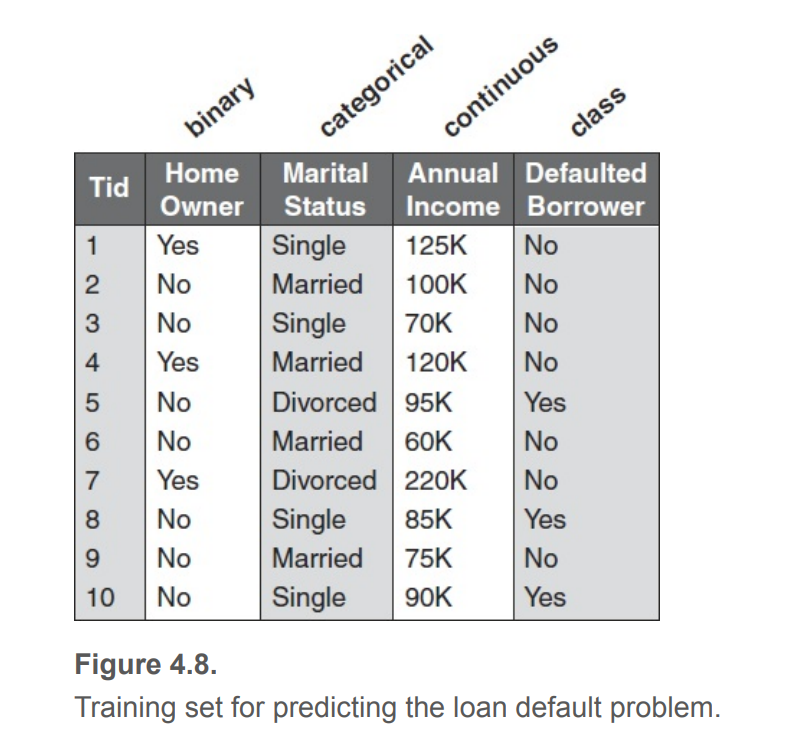

In [638]:
df = pd.DataFrame({'Class': ['Single','Married','Divorce'],
                  'Yes': [2,0,1],
                  'No': [2,4,1]})
df

,Class,Yes,No
0,Single,2,2
1,Married,0,4
2,Divorce,1,1


In [639]:
df = pd.DataFrame({'Class': ['yes','no'],
                  'Yes': [0, 3],
                  'No': [3,4]})
print('Homeowner')
print(df)
print('Answer:')
print('Single, Married = 1')
print('Single, Divorced = 0')
print('Married, Divorced = 1')
print('Refund = Yes, Refund = No: 6/7')

Homeowner
  Class  Yes  No
0   yes    0   3
1    no    3   4
Answer:
Single, Married = 1
Single, Divorced = 0
Married, Divorced = 1
Refund = Yes, Refund = No: 6/7


#Question 3

You are asked to evaluate the performance of two classification models,
and . The test set you have chosen contains 26 binary attributes,
labeled as A through Z. Table 4.13 shows the posterior probabilities
obtained by applying the models to the test set. (Only the posterior
probabilities for the positive class are shown). As this is a two-class problem,
and . Assume that we are mostly
interested in detecting instances from the positive class.

a. Plot the ROC curve for both and . (You should plot them on the
same graph.) Which model do you think is better? Explain your reasons.
− − + + + − − + − −
M1 M2
P(−)=1−P(+) P(−|A, …, Z)=1−P(+|A, …, Z)
M1 M2

b. For model , suppose you choose the cutoff threshold to be . In
other words, any test instances whose posterior probability is greater than
t will be classified as a positive example. Compute the precision, recall,
and F-measure for the model at this threshold value.

c. Repeat the analysis for part (b) using the same cutoff threshold on model
. Compare the F-measure results for both models. Which model is
better? Are the results consistent with what you expect from the ROC
curve?

d. Repeat part (b) for model using the threshold . Which threshold
do you prefer, or ? Are the results consistent with what you
expect from the ROC curve?


In [640]:
df = pd.DataFrame({'True Class': ['+','+','-','-','+','+','-','-','+','-'],
                   'P(+|A,Z,M1)': [.73,.69,.44,.55,.67,.47,.08,.15,.45,.35],
                   'P(+|A,Z,M2)': [.61,.03,.68,.31,.45,.09,.38,.05,.01,.04]})

In [641]:
df

,True Class,"P(+|A,Z,M1)","P(+|A,Z,M2)"
0,+,0.73,0.61
1,+,0.69,0.03
2,-,0.44,0.68
3,-,0.55,0.31
4,+,0.67,0.45
5,+,0.47,0.09
6,-,0.08,0.38
7,-,0.15,0.05
8,+,0.45,0.01
9,-,0.35,0.04


In [642]:
#(a)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [643]:
#define the predictor variables and the response variable
X = df[['P(+|A,Z,M1)']].to_numpy()
X2 = df[['P(+|A,Z,M2)']].to_numpy()
y = df['True Class']

In [644]:
import numpy as np
from sklearn.metrics import confusion_matrix

y_prediction = []
for i in X:
  if i >= 0.5:
    y_prediction.append(1)
  else:
    y_prediction.append(0)

In [645]:
y_prediction

[1, 1, 0, 1, 1, 0, 0, 0, 0, 0]

In [646]:
y_prediction2 = []
for i in X2:
  if i >= 0.5:
    y_prediction2.append(1)
  else:
    y_prediction2.append(0)
y = y.replace({'+': 1, '-': 0})

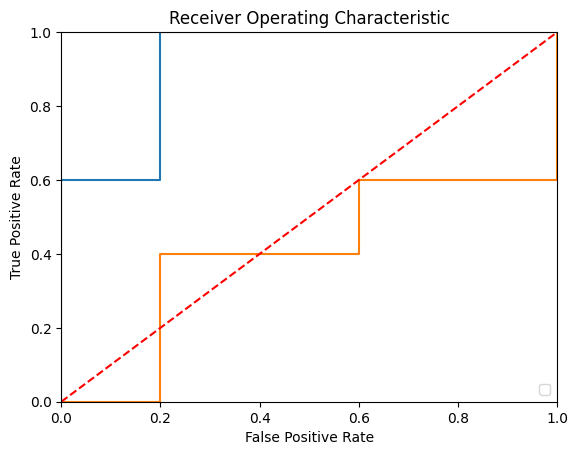

In [647]:
from sklearn import metrics
from sklearn .metrics import roc_auc_score
m1 = (y,y_prediction)
m2 = (y,y_prediction2)
auc = np.round(roc_auc_score(y,y_prediction),3)
auc = np.round(roc_auc_score(y,y_prediction2),3)
fpr1, tpr1, thresh = metrics.roc_curve(y_true = y, y_score = X)
plt.plot(fpr1,tpr1)
fpr2, tpr2, thresh = metrics.roc_curve(y_true = y, y_score = X2)
plt.plot(fpr2,tpr2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.show()


M1 is better, since its area under the ROC curve is larger than the area
under ROC curve for M2

#(b)
For model M1, suppose you choose the cutoff threshold to be t = 0.5.
In other words, any test instances whose posterior probability is greater
than t will be classified as a positive example. Compute the precision,
recall, and F-measure for the model at this threshold value.

When t = 0.5, the confusion matrix for M1 is shown below.

In [648]:
import numpy as np
from sklearn.metrics import confusion_matrix
c = cnf_matrix = confusion_matrix(y, y_prediction)
FP = c.sum(axis=0) - np.diag(c)
FN = c.sum(axis=1) - np.diag(c)
TP = np.diag(c)
TN = cnf_matrix.sum() - (FP + FN + TP)

# Sensitivity (True Positive Rate)
TPR = TP / (TP + FN)

# Specificity (True Negative Rate)
TNR = TN / (TN + FP)

# False Positive Rate
FPR = FP / (FP + TN)

print('Confusion Matrix')
print(c)
print('Precision = 3/4 = 75%')
print('Recall = 3/5 = 60%')
print('F-measure = (2 × .75 × .6)/(.75 + .6) = 0.667')

Confusion Matrix
[[4 1]
 [2 3]]
Precision = 3/4 = 75%
Recall = 3/5 = 60%
F-measure = (2 × .75 × .6)/(.75 + .6) = 0.667


#(Part C)

In [649]:
c = cnf_matrix = confusion_matrix(y, y_prediction2)
FP2 = c.sum(axis=0) - np.diag(c)
FN2 = c.sum(axis=1) - np.diag(c)
TP2 = np.diag(c)
TN2 = cnf_matrix.sum() - (FP2 + FN2 + TP2)

# Sensitivity (True Positive Rate)
TPR = TP2 / (TP2 + FN2)

# Specificity (True Negative Rate)
TNR = TN2 / (TN2 + FP2)

# False Positive Rate
FPR = FP2 / (FP2 + TN2)

print('Confusion Matrix')
print(c)
print('Precision = 1/2 = 50%')
print('Recall = 1/5 = 20%')
print('F-measure = (2 × .5 × .2)/(.5 + .2) = 0.2857')
print('Based on F-measure, M1 is still better than M2. This result is consistent with the ROC plot.')

Confusion Matrix
[[4 1]
 [4 1]]
Precision = 1/2 = 50%
Recall = 1/5 = 20%
F-measure = (2 × .5 × .2)/(.5 + .2) = 0.2857
Based on F-measure, M1 is still better than M2. This result is consistent with the ROC plot.


#(d)

Repeat part (c) for model M1 using the threshold t = 0.1. Which
threshold do you prefer, t = 0.5 or t = 0.1? Are the results consistent
with what you expect from the ROC curve?

In [650]:
y_prediction = []
for i in X:
  if i >= 0.1:
    y_prediction.append(1)
  else:
    y_prediction.append(0)

FP = c.sum(axis=0) - np.diag(c)
FN = c.sum(axis=1) - np.diag(c)
TP = np.diag(c)
TN = cnf_matrix.sum() - (FP + FN + TP)

# Sensitivity (True Positive Rate)
TPR = TP / (TP + FN)

# Specificity (True Negative Rate)
TNR = TN / (TN + FP)

# False Positive Rate
FPR = FP / (FP + TN)

c = cnf_matrix = confusion_matrix(y, y_prediction)
print('Confusion Matrix:')
print(c)
print('Precision = 5/9 = 55.6%')
print('Recall = 5/5 = 100%')
print('F-measure = (2 × .556 × 1)/(.556 + 1) = 0.715')
print('According to F-measure, t = 0.1 is better than t = 0.5.When t = 0.1, FPR = 0.8 and TPR = 1.')
print('On the other hand, when t = 0.5, FPR = 0.2 and T RP = 0.6. Since (0.2, 0.6) is closer to the point (0, 1), we favor t = 0.5.')
print('This result is inconsistent with the results using F-measure. We can also show this by computing the area under the ROC curve')
print('For t = 0.5, area = 0.6 × (1 − 0.2) = 0.6 × 0.8=0.48')
print('For t = 0.1, area = 1 × (1 − 0.8) = 1 × 0.2=0.2')
print('Since the area for t = 0.5 is larger than the area for t = 0.1, we prefer t = 0.5')

Confusion Matrix:
[[1 4]
 [0 5]]
Precision = 5/9 = 55.6%
Recall = 5/5 = 100%
F-measure = (2 × .556 × 1)/(.556 + 1) = 0.715
According to F-measure, t = 0.1 is better than t = 0.5.When t = 0.1, FPR = 0.8 and TPR = 1.
On the other hand, when t = 0.5, FPR = 0.2 and T RP = 0.6. Since (0.2, 0.6) is closer to the point (0, 1), we favor t = 0.5.
This result is inconsistent with the results using F-measure. We can also show this by computing the area under the ROC curve
For t = 0.5, area = 0.6 × (1 − 0.2) = 0.6 × 0.8=0.48
For t = 0.1, area = 1 × (1 − 0.8) = 1 × 0.2=0.2
Since the area for t = 0.5 is larger than the area for t = 0.1, we prefer t = 0.5


#Question 4
Following is a data set that contains two attributes, X and Y , and two
class labels, “ ” and “ ”. Each attribute can take three different values: 0, 1, or
2.

In [651]:
df = pd.DataFrame({'X': [0,1,2,0,1,2,0,1,2],
                   'Y': [0,0,0,1,1,1,2,2,2],
                   '+': [0,0,0,10,10,10,0,0,0],
                   '-': [100,0,100,100,0,100,100,0,100]})

In [652]:
df

,X,Y,+,-
0,0,0,0,100
1,1,0,0,0
2,2,0,0,100
3,0,1,10,100
4,1,1,10,0
5,2,1,10,100
6,0,2,0,100
7,1,2,0,0
8,2,2,0,100


The concept for the “ ” class is and the concept for the “ ” class is.

a. Build a decision tree on the data set. Does the tree capture the “+ ” and
“-” concepts?

b. What are the accuracy, precision, recall, and -measure of the decision
tree? (Note that precision, recall, and -measure are defined with
+ −
+ −
+ Y=1 −
X=0∨X=2
+
−
F1
F1
respect to the “ ” class.)

c. Build a new decision tree with the following cost function:
(Hint: only the leaves of the old decision tree need to be changed.) Does
the decision tree capture the “ ” concept?

d. What are the accuracy, precision, recall, and -measure of the new
decision tree?

In [653]:
data = df['X'].to_numpy()
target = df['-'].to_numpy()

In [654]:
#(a)
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score

data = data.reshape(-1, 1)
target = target.reshape(-1, 1)
# Define a weak classifier (Decision Tree with max depth 1)
weak_classifier = DecisionTreeClassifier(max_depth=1, random_state = 47)
clf = tree.DecisionTreeClassifier(max_depth=3, random_state = 47)
clf = clf.fit(data,target)
pred = clf.predict(data)
pred

array([100,   0, 100, 100,   0, 100, 100,   0, 100])

[Text(0.4, 0.8333333333333334, 'x[0] <= 0.5\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6, 0.5, 'x[0] <= 1.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

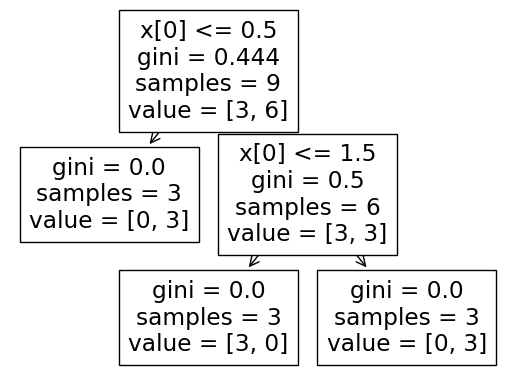

In [655]:
tree.plot_tree(clf)

In [656]:
#(b)
from sklearn.metrics import precision_recall_fscore_support as score

predicted = pred
y_test = target

precision, recall, fscore, support = score(y_test, predicted)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [1. 1.]
recall: [1. 1.]
fscore: [1. 1.]
support: [3 6]


In [657]:
df['Y']

0    0
1    0
2    0
3    1
4    1
5    1
6    2
7    2
8    2
Name: Y, dtype: int64

In [658]:
#(c)
data = df['Y'].to_numpy()
target = df['+'].to_numpy()
data = data.reshape(-1, 1)
target = target.reshape(-1, 1)
# Define a weak classifier (Decision Tree with max depth 1)
weak_classifier = DecisionTreeClassifier(max_depth=1, random_state = 47)
clf = tree.DecisionTreeClassifier(max_depth=3, random_state = 47)
clf = clf.fit(data,target)
pred = clf.predict(data)
pred

array([ 0,  0,  0, 10, 10, 10,  0,  0,  0])

In [659]:
#(d)
predicted = pred
y_test = target

precision, recall, fscore, support = score(y_test, predicted)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [1. 1.]
recall: [1. 1.]
fscore: [1. 1.]
support: [6 3]


#Question 5
18. Consider the task of building a classifier from random data, where the
attribute values are generated randomly irrespective of the class labels.
Assume the data set contains instances from two classes, “+ ” and “ -.” Half of
the data set is used for training while the remaining half is used for testing.

a. Suppose there are an equal number of positive and negative instances in
the data and the decision tree classifier predicts every test instance to be
positive. What is the expected error rate of the classifier on the test data?

b. Repeat the previous analysis assuming that the classifier predicts each
test instance to be positive class with probability 0.8 and negative class
with probability 0.2.

c. Suppose two-thirds of the data belong to the positive class and the
remaining one-third belong to the negative class. What is the expected
error of a classifier that predicts every test instance to be positive?

d. Repeat the previous analysis assuming that the classifier predicts each
test instance to be positive class with probability 2/3 and negative class
with probability 1/3

#(a)
The expected error rate logically would be 50% if there are two classes, and it always predicts one of the classes to be '+' every time.

#(b)
The expected error rate can be calculated as a weighted average of the error rates for positive and negative instances:
Error rate for positive instances: (0.2) (since 20% of positive instances are misclassified).
Error rate for negative instances: (0.8) (since 80% of negative instances are misclassified).
Expected error rate = (0.2 \times 0.5 + 0.8 \times 0.2 = 0.3).
Therefore, the expected error rate of the classifier is 0.3.

#(c) and (d)

Expected error rate = 1/3

#Question 6
(2 points) based on the same question as problem 5 above for simulating step a, b and d by using Weka
or python, remember to select your own test dataset in the option of the validation method.
To answer the question

a)

Step 1: Create 120 random numbers in (0,1) with random functions in Python, R, or MS Excel

Step 2: label the first 60 cases in positive (1) and other 60 in a negative (-1), make sure the classes are
nominal variable.

Step 3 Sort the random numbers with the classes so that the dataset is well mixed and save it as the
training dataset for Decision tree

Step 4, Create another dataset with the same procedure and save it as the Testing dataset.
To answer question

b), you simply label 80 out of 100 as positive, and 20 as negative, instead.

c) is obvious, d can be simulated in the same way as b.

In [660]:
import random
x1 = np.random.randint(120, size=120)
y1 = np.random.randint(0, 2, size=120)
df = pd.DataFrame({'X': x1.tolist(), 'Y': y1.tolist()})
df

,X,Y
0,102,0
1,78,0
2,53,1
3,17,1
4,111,1
...,...,...
115,111,0
116,69,0
117,75,1
118,32,0


In [661]:
df_train = df

In [662]:
x2 = np.random.randint(120, size = 120)
y2 = np.random.randint(0, 2, size = 120)
df1 = pd.DataFrame({'X': x2.tolist(), 'Y': y2.tolist()})

In [663]:
df_test = df1

In [664]:
print(df_train)
print(df_test)

       X  Y
0    102  0
1     78  0
2     53  1
3     17  1
4    111  1
..   ... ..
115  111  0
116   69  0
117   75  1
118   32  0
119   12  0

[120 rows x 2 columns]
       X  Y
0     36  1
1     73  0
2     88  0
3     46  0
4     51  1
..   ... ..
115   41  0
116   88  1
117  105  0
118   87  1
119   40  1

[120 rows x 2 columns]


In [665]:
data = df['X'].to_numpy()
target = df['Y'].to_numpy()
data = data.reshape(-1, 1)
target = target.reshape(-1, 1)
# Define a weak classifier (Decision Tree with max depth 1)
weak_classifier = DecisionTreeClassifier(max_depth=1, random_state = 47)
clf = tree.DecisionTreeClassifier(max_depth=3, random_state = 47)
clf = clf.fit(data,target)
pred = clf.predict(data)
pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [666]:
data = df1['X'].to_numpy()
target = df1['Y'].to_numpy()
data = data.reshape(-1, 1)
target = target.reshape(-1, 1)
# Define a weak classifier (Decision Tree with max depth 1)
weak_classifier = DecisionTreeClassifier(max_depth=1, random_state = 47)
clf = tree.DecisionTreeClassifier(max_depth=3, random_state = 47)
clf = clf.fit(data,target)
pred = clf.predict(data)
pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

#Question 7
(a) Use Singular Value decomposition to identify the two principal components of the iris
dataset and find how much variance the two components capture.
Read the csv file to a numpy double array X.
>>> from numpy import linalg
>>> X_centered = X – X.mean(axis = 0)
>>> U, s, Vt = np.ligalg.svd(X_centered)
>>> c1 = Vt.T[:, 0]
>>> c2 = Vt.T[:, 1]

(b) Use Sklearn PCA package to find the two principal components and how much variances they
captures.
>>> from sklearn.decomposition import pca
>>> pca = PCA(n_components = 2)
>>>X2D = pca.fit_transform(X)
>>>cumsum = np.cumsum(pca.explained_variance_ratio_)

(c) Use decision tree to classify both the original iris dataset and the de-noised dataset that you find in
step b, and compare their classification performances.

In [667]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS 540 Data Mining/iris.csv')

In [668]:
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [669]:
from sklearn.preprocessing import StandardScaler
features = df[['5.1', '3.5', '1.4', '0.2']]
target = df['Iris-setosa']
scaled_features = StandardScaler().fit_transform(features)

In [670]:
target

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
144    Iris-virginica
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
Name: Iris-setosa, Length: 149, dtype: object

In [671]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2D = pca.fit_transform(features)
principalComponents = pca.fit_transform(scaled_features)

In [672]:
pcasolo = PCA(n_components = 1)
solo_PrincipalComponent = pcasolo.fit_transform(scaled_features)
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.72620033, 0.9576744 ])

array([0.98      , 0.92      , 0.95918367])

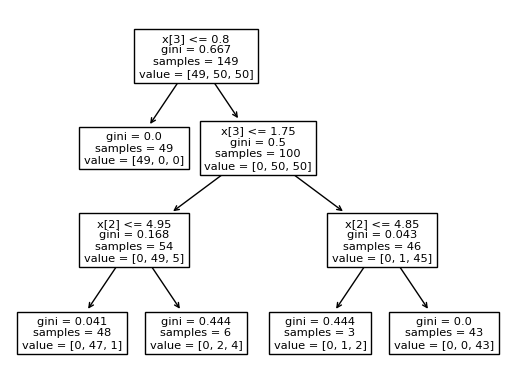

In [673]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import pydot
from sklearn import tree
from sklearn.model_selection import train_test_split
X = features
y = target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20,random_state = 47)
clf = DecisionTreeClassifier(random_state=0, max_depth = 3)
clf = clf.fit(X, y)
tree.plot_tree(clf)
cross_val_score(clf, X, y, cv=3)

array([0.94      , 0.9       , 0.95918367])

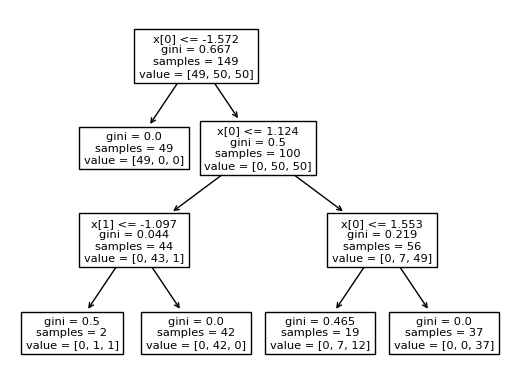

In [674]:
X = X2D
y = target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20,random_state = 47)
clf = DecisionTreeClassifier(random_state=0, max_depth = 3)
clf = clf.fit(X, y)
tree.plot_tree(clf)
cross_val_score(clf, X, y, cv=3)

Overall, I think that the first decision tree model is slightly overfitting while the singular value decomposition model has been scaled. I think that makes the decision tree in the second model truly more accurate than the first.

#Question 8

8. (3 points)

(a) What makes Extra-Tree more random than regular Random Forest? How can this extra
randomness help?


(b) Are Extra-Tree slower or faster than regular Random Forest? Replace the iris dataset by the Sonar
dataset for the codes on page 199 of Geron’s book (chapter 7) and compare the training time.


(c ) Use the Sonar_test Data to compare the model accuracy of both Extra-Tree and Random Forest.

#(a)
Random Forest chooses the optimum split while Extra Trees chooses it randomly. However, once the split points are selected, the two algorithms choose the best one between all the subset of features. Therefore, Extra Trees adds randomization but still has optimization. These differences motivate the reduction of both bias and variance.

#(b)
In terms of computational cost, and therefore execution time, the Extra Trees algorithm is faster. This algorithm saves time because the whole procedure is the same, but it randomly chooses the split point and does not calculate the optimal one.

In [675]:
#(b)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS 540 Data Mining/sonar_train.csv')
dfc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS 540 Data Mining/sonar_train.csv')

In [676]:
df.drop(columns=['-1'], inplace=True)
X = df.values
y = dfc['-1']

Training time: 0.0018839836120605469s


array([0.72222222, 0.64705882, 0.64705882])

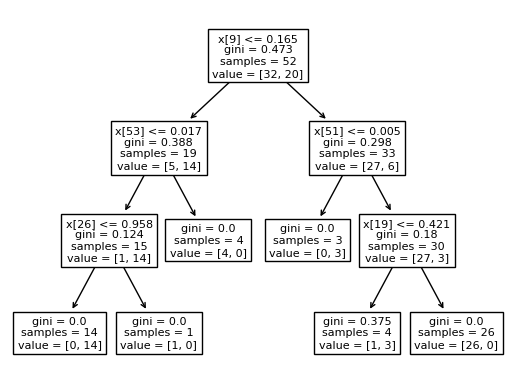

In [677]:
#Same size as the Training set in Shared Google Drive after being split.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.40,random_state = 47)
clf = DecisionTreeClassifier(random_state=0, max_depth = 3)
clf = clf.fit(X_test, y_test)
model = DecisionTreeClassifier(random_state=0, max_depth = 3)
start = time.time()
model.fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
tree.plot_tree(clf)
cross_val_score(clf, X_test, y_test, cv=3)

Training time: 0.005043983459472656s


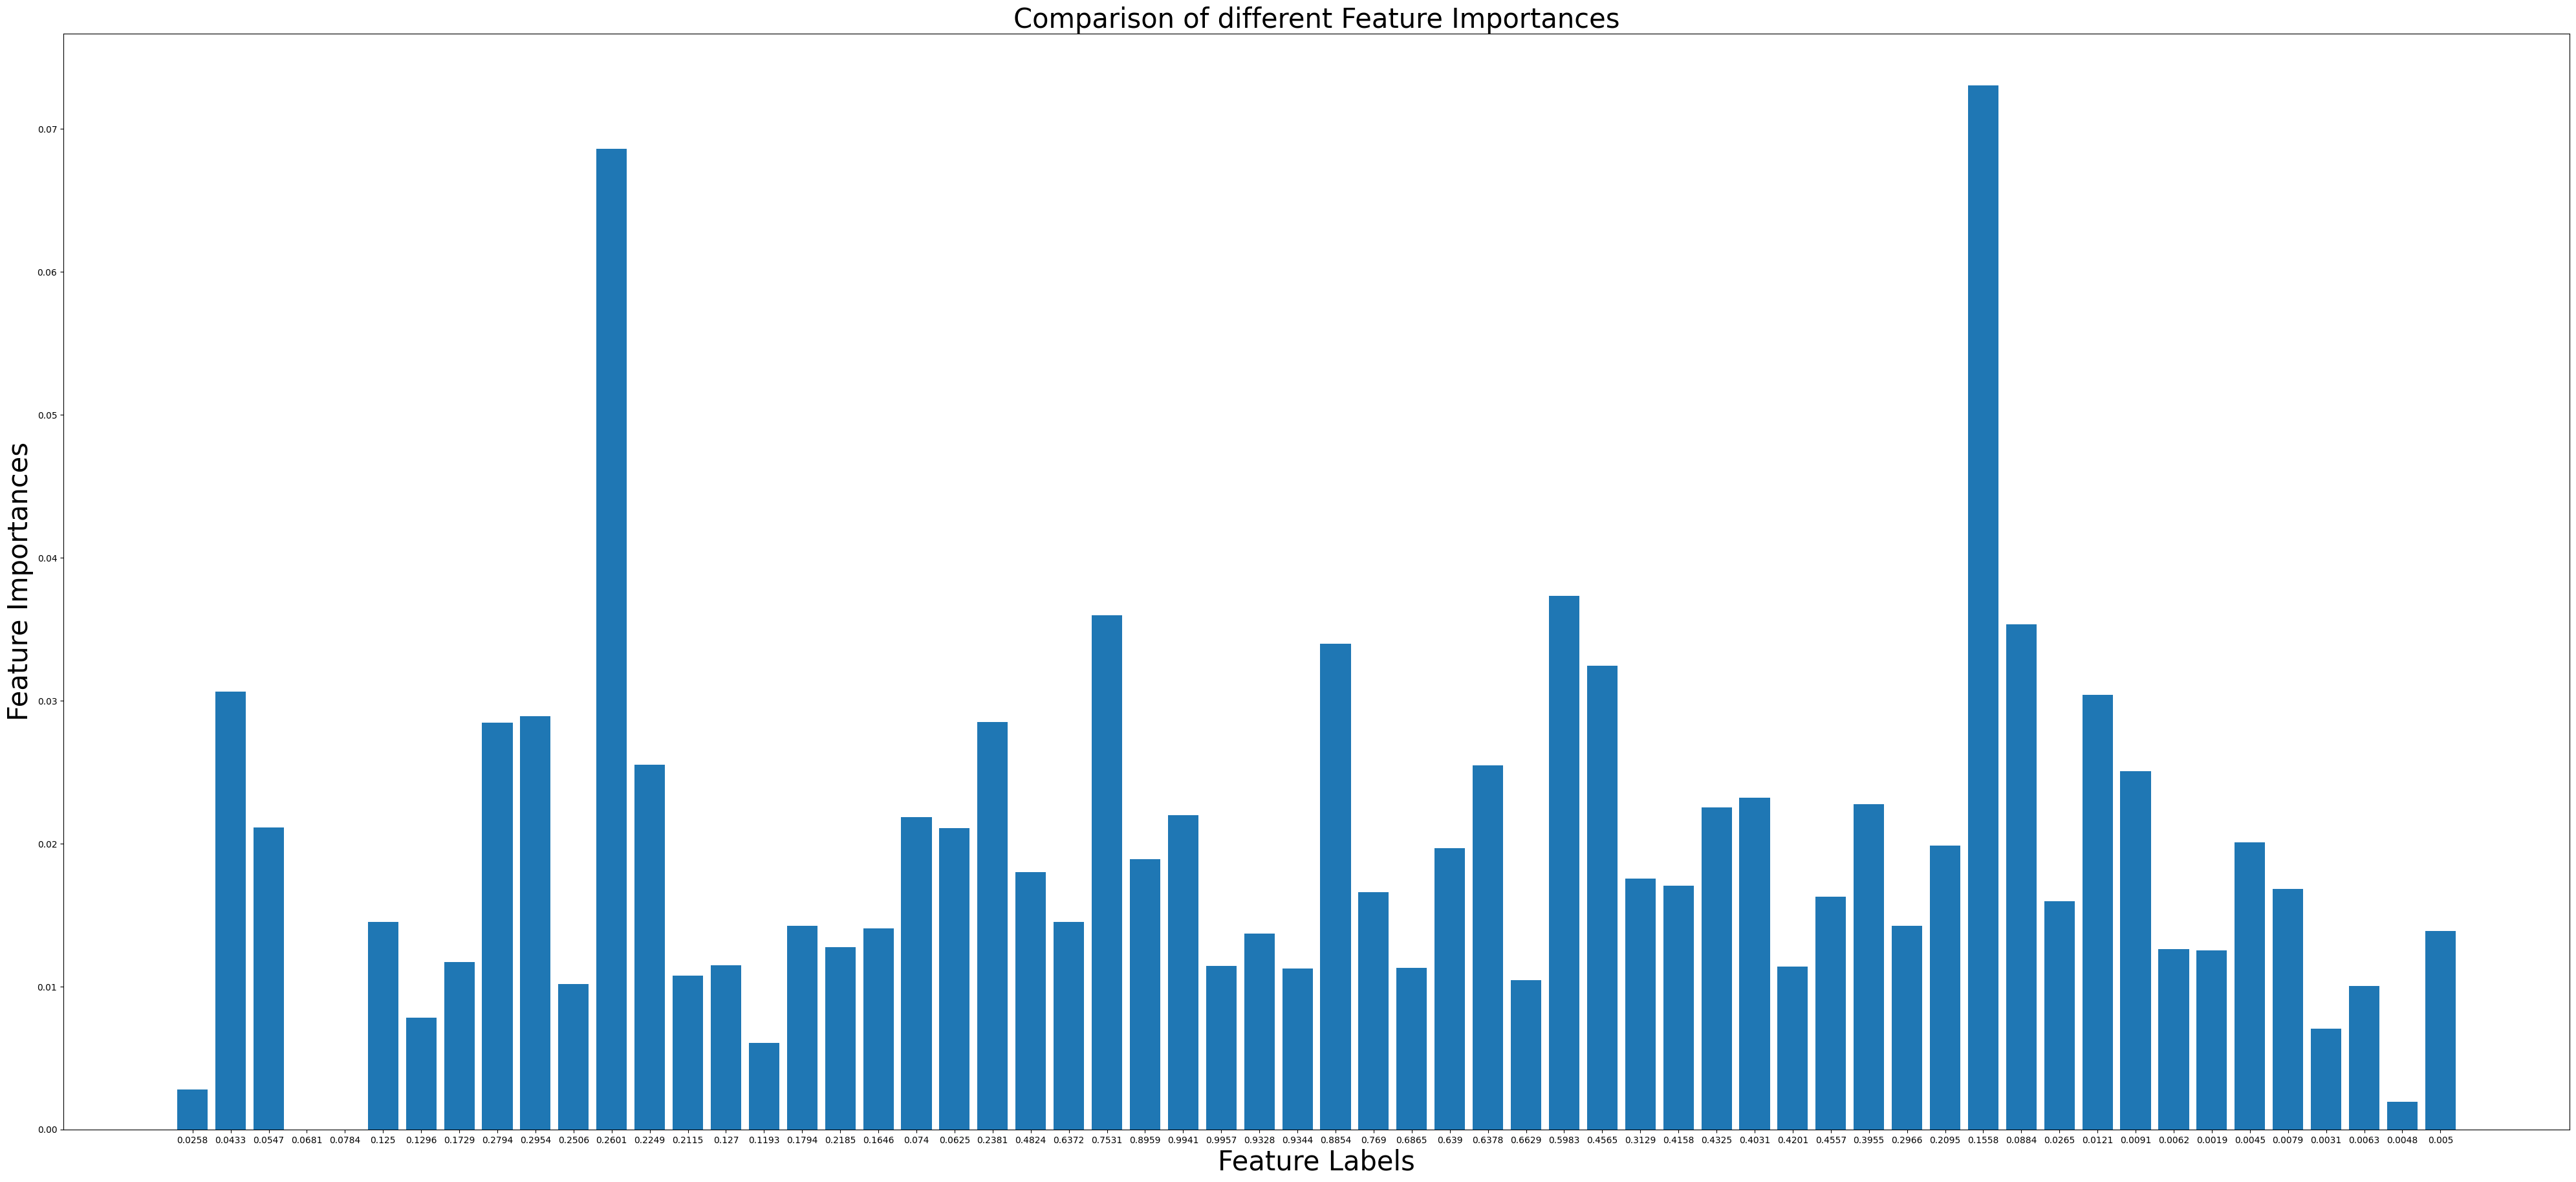

In [678]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
clf = extra_tree_forest.fit(X_train, y_train)
model = extra_tree_forest
start = time.time()
model.fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in
                                        extra_tree_forest.estimators_],
                                        axis = 0)
plt.figure(figsize=(50,22))
plt.bar(df.columns, feature_importance_normalized)
plt.xlabel('Feature Labels', fontsize = 30)
plt.ylabel('Feature Importances', fontsize = 30)
plt.title('Comparison of different Feature Importances', fontsize = 30)
plt.show()

In [679]:
cross_val_score(clf, X_train, y_train, cv=3)

array([0.69230769, 0.57692308, 0.64      ])

In [680]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import time


model = RandomForestClassifier(max_depth=2, random_state=0)
start = time.time()
model.fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
RandomForestClassifier()
print(clf.predict(X_train))
clf
cross_val_score(clf, X_train, y_train, cv=3)

Training time: 0.10513186454772949s
[-1  1  1 -1  1  1 -1 -1  1 -1 -1 -1  1 -1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1  1 -1  1 -1  1 -1  1 -1 -1 -1 -1 -1  1  1  1 -1  1
 -1  1  1  1  1  1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1  1  1 -1  1  1  1  1
 -1  1 -1 -1  1]


array([0.76923077, 0.76923077, 0.8       ])

In [681]:
#(C) Model accuracy and time can be seen in section B above as well.

#Question 9
This problem uses the Universal Bank Data set.

(a) Select an ensemble method, Bagging, or AdaBoost to train a model and evaluate the
performance of your model.

(b) Select any model you learned so far and write a nested 3 fold cross-validation program to
classify and evaluate the performance of the optimized model.

In [682]:
from sklearn.metrics import accuracy_score
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS 540 Data Mining/UniversalBank.csv')

In [683]:
df.head()
#Using Personal Loan as Target for Model

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [684]:
X = df.drop(columns = ['Age','ZIP Code','Personal Loan'], axis = 1)
y = df['Personal Loan']

In [685]:
df = df.drop(columns = ['Age','ZIP Code','Personal Loan'])

In [686]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= .40,random_state = 47)

In [687]:
from sklearn.ensemble import AdaBoostClassifier
# Define a weak classifier (Decision Tree with max depth 1)
weak_classifier = DecisionTreeClassifier(max_depth=1)
# Create an AdaBoostClassifier with 10 estimators
adaboost_model = AdaBoostClassifier(base_estimator=weak_classifier, n_estimators=3)
adaboost_model.fit(X_train, y_train)

y_pred = adaboost_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
model = AdaBoostClassifier
start = time.time()
stop = time.time()
print(f"Training time: {stop - start}s")
accuracy

Training time: 3.337860107421875e-05s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.946

Training time: 0.013254404067993164s


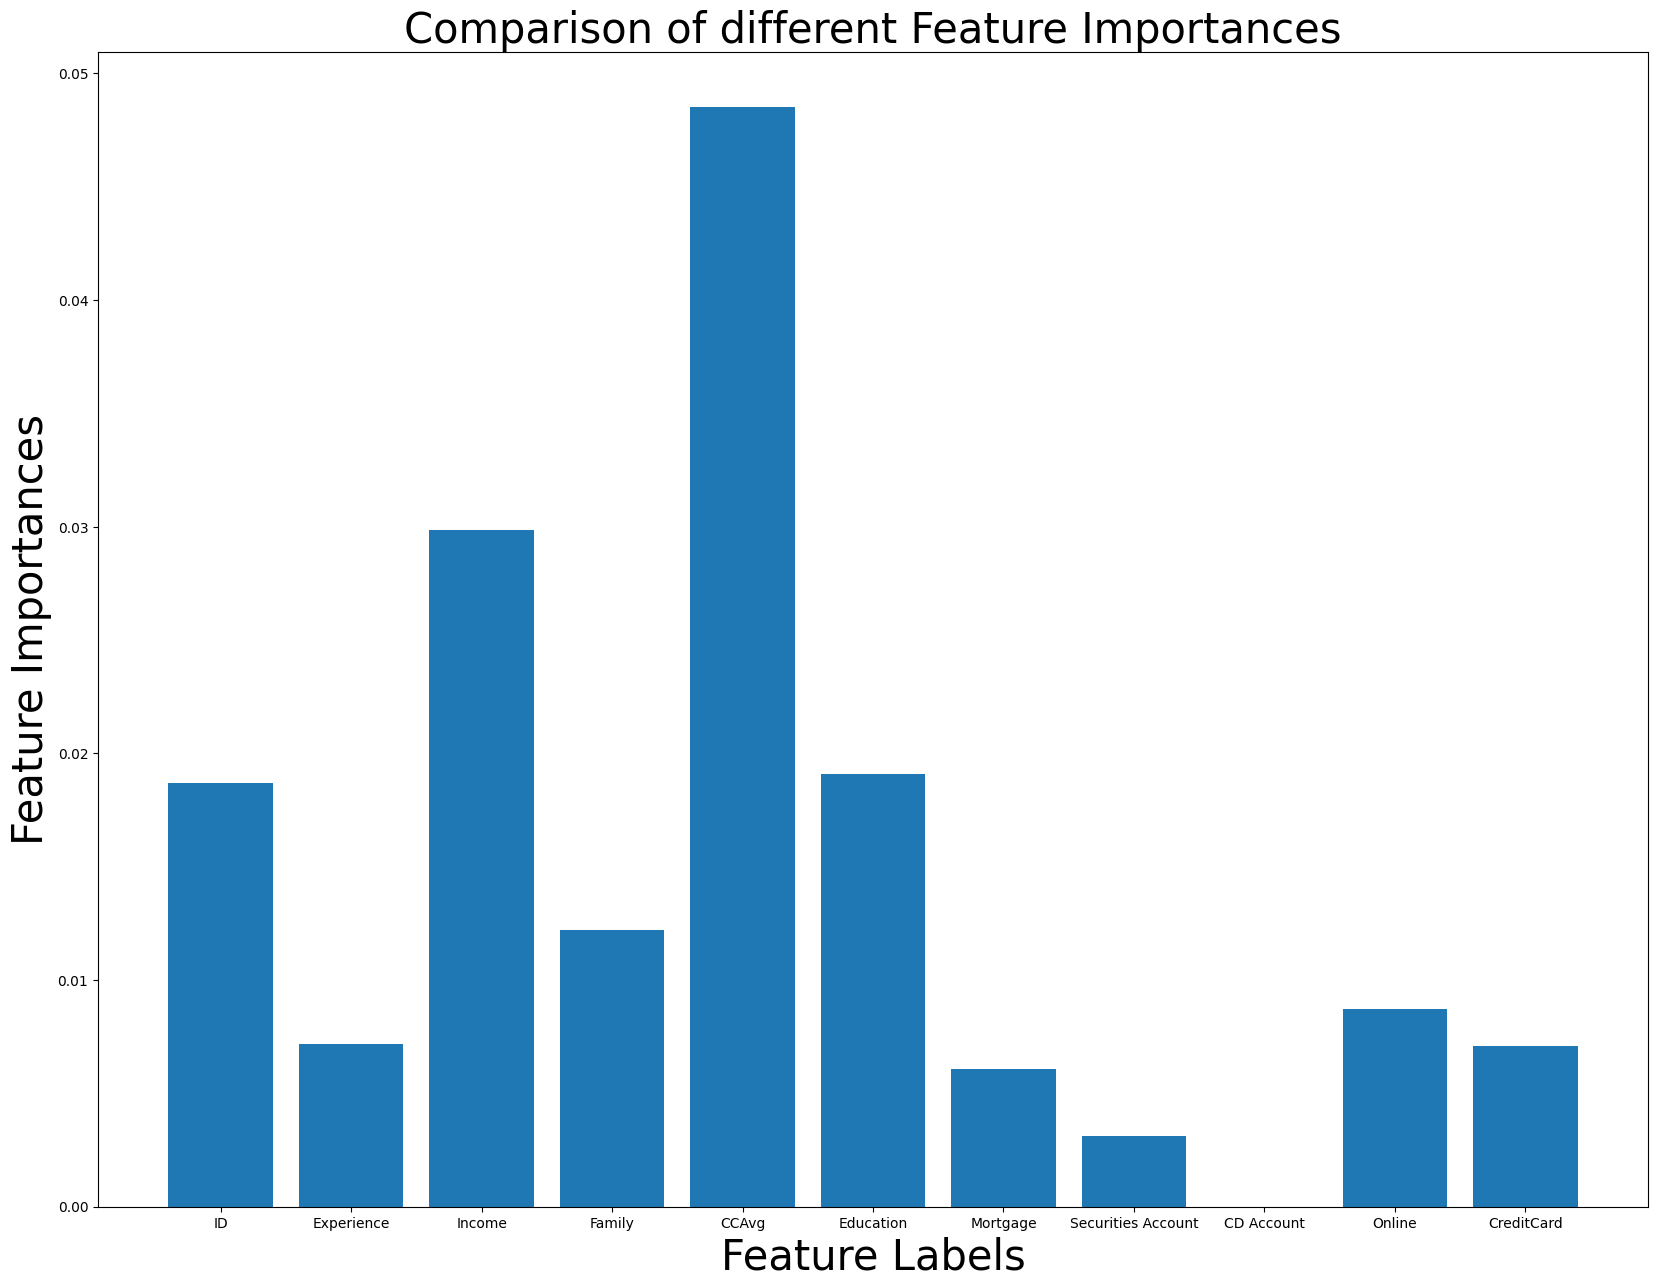

In [688]:
#(b)
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
clf = extra_tree_forest.fit(X_train, y_train)
model = extra_tree_forest
start = time.time()
model.fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in
                                        extra_tree_forest.estimators_],
                                        axis = 0)
plt.figure(figsize=(20,15))
plt.bar(df.columns, feature_importance_normalized)
plt.xlabel('Feature Labels', fontsize = 30)
plt.ylabel('Feature Importances', fontsize = 30)
plt.title('Comparison of different Feature Importances', fontsize = 30)
plt.show()

References

https://medium.com/swlh/an-intuitive-approach-to-pca-fc4d05c14c19

https://quantdare.com/what-is-the-difference-between-extra-trees-and-random-forest/#:~:text=Random%20Forest%20chooses%20the%20optimum%20split%20while%20Extra,motivate%20the%20reduction%20of%20both%20bias%20and%20variance.

https://quantdare.com/what-is-the-difference-between-extra-trees-and-random-forest/

https://www.geeksforgeeks.org/ml-extra-tree-classifier-for-feature-selection/